In [72]:
# Шаг 1: Загрузка данных и предварительный анализ

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загрузка данных
dataset1_path = 'website_performance_metrics(Dataset1).csv'
dataset1 = pd.read_csv(dataset1_path)

# Первичный анализ
print(dataset1.head())  # Показать первые 5 строк
print(dataset1.info())  # Информация о типах данных и пропусках
print(dataset1.describe())  # Статистический обзор

   Sr No                                        website_url Category  \
0      0     https://www.booking.com/index.html?aid=1743217   Travel   
1      1                   https://travelsites.com/expedia/   Travel   
2      2               https://travelsites.com/tripadvisor/   Travel   
3      3              https://www.momondo.in/?ispredir=true   Travel   
4      4  https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...   Travel   

   Page Size (KB)  Load Time(s)  Response Time(s)  Throughput  \
0          3400.0         4.190             0.523      622.58   
1          1331.2         1.040             0.350       20.00   
2          1945.6         0.833             0.392      331.29   
3         13926.4         0.049             0.297        1.21   
4          4300.8         0.751             1.211       61.45   

  Performance_Label User Response  
0            medium        Medium  
1              fast          Fast  
2              fast        Medium  
3              fast          Fas

In [74]:
# Шаг 2: Очистка данных

In [75]:
# Удаление дубликатов
dataset1 = dataset1.drop_duplicates()

# Обработка пропущенных значений для категориальных столбцов
# Проверяем, что mode() возвращает значение
if not dataset1['Category'].mode().empty:
    dataset1['Category'] = dataset1['Category'].fillna(dataset1['Category'].mode()[0])

if not dataset1['Performance_Label'].mode().empty:
    dataset1['Performance_Label'] = dataset1['Performance_Label'].fillna(dataset1['Performance_Label'].mode()[0])

if not dataset1['User Response'].mode().empty:
    dataset1['User Response'] = dataset1['User Response'].fillna(dataset1['User Response'].mode()[0])

# Обработка пропусков только в числовых столбцах
numeric_columns = ['Page Size (KB)', 'Load Time(s)', 'Response Time(s)', 'Throughput']
dataset1[numeric_columns] = dataset1[numeric_columns].fillna(dataset1[numeric_columns].median())

# Проверка на пропущенные значения
print(dataset1.isnull().sum())  # Подсчёт оставшихся пропусков

Sr No                0
website_url          0
Category             0
Page Size (KB)       0
Load Time(s)         0
Response Time(s)     0
Throughput           0
Performance_Label    0
User Response        0
dtype: int64


In [76]:
# Шаг 3: Нормализация/стандартизация данных

In [77]:
scaler = StandardScaler()
dataset1[['Load Time(s)', 'Page Size (KB)', 'Throughput']] = scaler.fit_transform(
    dataset1[['Load Time(s)', 'Page Size (KB)', 'Throughput']]
)

# Проверка изменений
print(dataset1.head())

   Sr No                                        website_url Category  \
0      0     https://www.booking.com/index.html?aid=1743217   Travel   
1      1                   https://travelsites.com/expedia/   Travel   
2      2               https://travelsites.com/tripadvisor/   Travel   
3      3              https://www.momondo.in/?ispredir=true   Travel   
4      4  https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...   Travel   

   Page Size (KB)  Load Time(s)  Response Time(s)  Throughput  \
0       -0.425229      1.507046             0.523    0.303214   
1       -0.434385     -0.468391             0.350   -0.295428   
2       -0.431666     -0.598205             0.392    0.013828   
3       -0.378642     -1.089869             0.297   -0.314095   
4       -0.421243     -0.649629             1.211   -0.254249   

  Performance_Label User Response  
0            medium        Medium  
1              fast          Fast  
2              fast        Medium  
3              fast          Fas

In [78]:
# Шаг 4: Визуализация данных

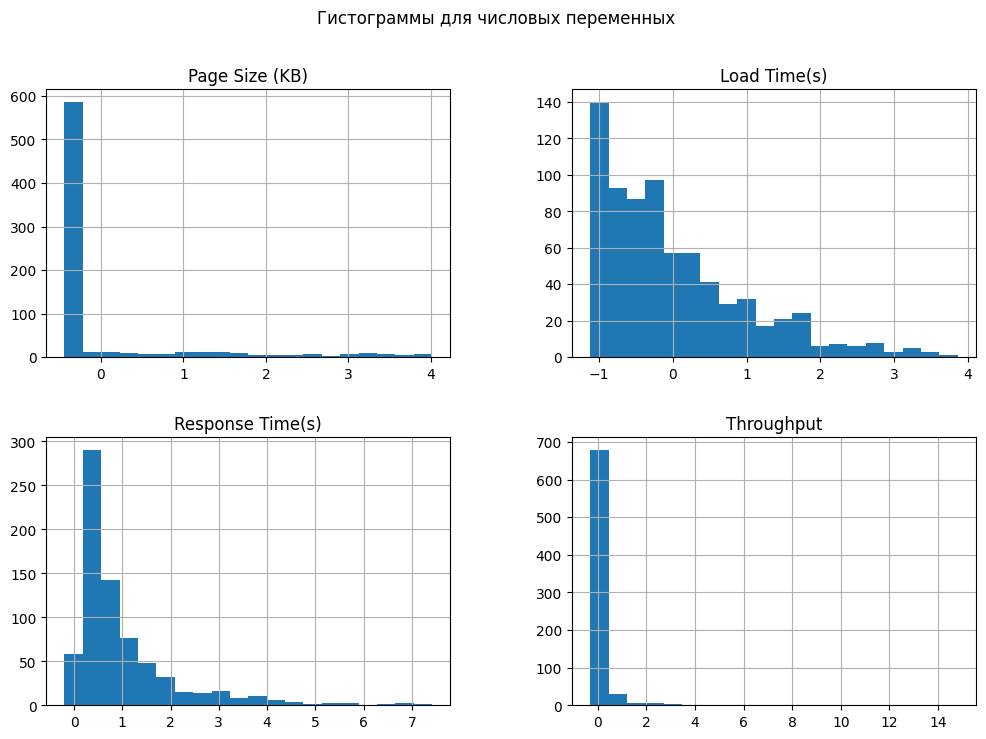

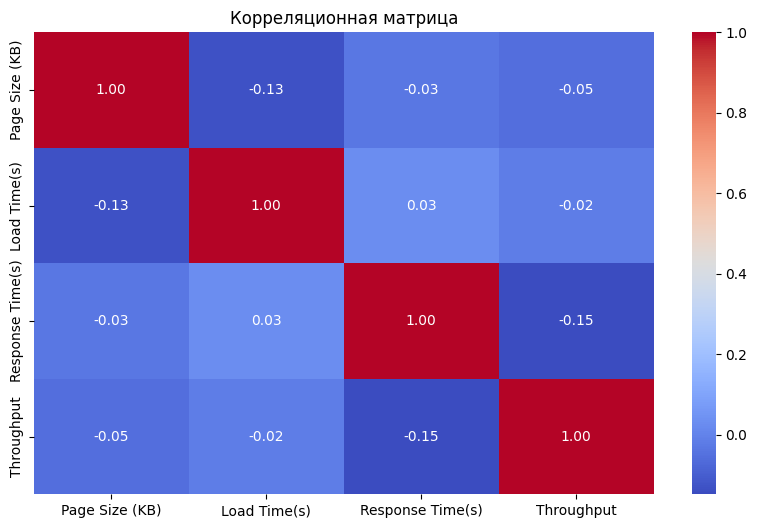

In [79]:
# Удаляем нечисловые столбцы
numerical_columns = ['Page Size (KB)', 'Load Time(s)', 'Response Time(s)', 'Throughput']

# Гистограммы для числовых переменных
dataset1[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Гистограммы для числовых переменных')
plt.show()

# Тепловая карта корреляций
plt.figure(figsize=(10, 6))
sns.heatmap(dataset1[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

In [80]:
# Шаг 5: Подготовка данных для модели

In [82]:
#Проверка наименований столбцов
print(dataset1.columns)

# Фичи и целевая переменная
X1 = dataset1[['Load Time(s)', 'Page Size (KB)', 'Throughput']]
y1 = dataset1['Performance_Label']

# Разделение на обучающую и тестовую выборку
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Проверка размеров данных
print(f"Размеры обучающего набора: {X_train1.shape}, Размеры тестового набора: {X_test1.shape}")

Index(['Sr No', 'website_url', 'Category', 'Page Size (KB)', 'Load Time(s)',
       'Response Time(s)', 'Throughput', 'Performance_Label', 'User Response'],
      dtype='object')
Размеры обучающего набора: (587, 3), Размеры тестового набора: (147, 3)


In [83]:
# Шаг 7: Сохранение подготовленных данных

In [84]:
# Сохранение подготовленных данных
dataset1.to_csv('dataset_1.csv', index=False)

In [85]:
# Шаг 8: Проверка сохранённых данных

In [86]:
dataset_check = pd.read_csv('dataset_1.csv')

# Просмотр первых нескольких строк для проверки
print(dataset_check.head())

# Проверка, что пропуски и данные сохранены корректно
print(dataset_check.isnull().sum())

   Sr No                                        website_url Category  \
0      0     https://www.booking.com/index.html?aid=1743217   Travel   
1      1                   https://travelsites.com/expedia/   Travel   
2      2               https://travelsites.com/tripadvisor/   Travel   
3      3              https://www.momondo.in/?ispredir=true   Travel   
4      4  https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...   Travel   

   Page Size (KB)  Load Time(s)  Response Time(s)  Throughput  \
0       -0.425229      1.507046             0.523    0.303214   
1       -0.434385     -0.468391             0.350   -0.295428   
2       -0.431666     -0.598205             0.392    0.013828   
3       -0.378642     -1.089869             0.297   -0.314095   
4       -0.421243     -0.649629             1.211   -0.254249   

  Performance_Label User Response  
0            medium        Medium  
1              fast          Fast  
2              fast        Medium  
3              fast          Fas